# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Unsupervised Learning on Classification using Random Forest

<b>Anggota Kelompok</b>
1. Dhafa Nur Fadillah - 1301213263
2. Fadli Dwi Ramadhan - 1301210062
3. Marcel Binggi Antonio - 1301210349

# **Latar Belakang**

In [ ]:
# Import modul yang dibutuhkan
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt # Modul untuk membuat diagram batang
import seaborn as sns # Modul untuk membuat pairplot
import requests
from collections import Counter
from zipfile import ZipFile
from io import BytesIO

## **Read Data**

In [ ]:
# Download ZIP file
response = requests.get('https://archive.ics.uci.edu/static/public/46/hepatitis.zip')
zip_file = ZipFile(BytesIO(response.content))

# List files in the ZIP file
file_list = zip_file.namelist()
print("Files in the ZIP file:", file_list)

# Extract the 'hepatitis.data' file
desired_file = 'hepatitis.data'
if desired_file in file_list:
    with zip_file.open(desired_file) as file:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file, header=None, na_values='?')

        print("Dataset loaded successfully.")
else:
    print(f"The '{desired_file}' file is not present in the ZIP file.")

Files in the ZIP file: ['Index', 'costs/', 'costs/Index', 'costs/hepatitis.README', 'costs/hepatitis.cost', 'costs/hepatitis.delay', 'costs/hepatitis.expense', 'costs/hepatitis.group', 'hepatitis.data', 'hepatitis.names']
Dataset loaded successfully.


In [ ]:
df.set_axis(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
            'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES',
            'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY'], axis = "columns", inplace =True)

<ipython-input-3-fe40b16bffa8>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',


In [ ]:
# Output data frame
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   AGE              155 non-null    int64  
 2   SEX              155 non-null    int64  
 3   STEROID          154 non-null    float64
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          154 non-null    float64
 6   MALAISE          154 non-null    float64
 7   ANOREXIA         154 non-null    float64
 8   LIVER BIG        145 non-null    float64
 9   LIVER FIRM       144 non-null    float64
 10  SPLEEN PALPABLE  150 non-null    float64
 11  SPIDERS          150 non-null    float64
 12  ASCITES          150 non-null    float64
 13  VARICES          150 non-null    float64
 14  BILIRUBIN        149 non-null    float64
 15  ALK PHOSPHATE    126 non-null    float64
 16  SGOT             151 non-null    float64
 17  ALBUMIN         

## **Data Preprocessing**

### **Drop Unneccesary Colums**

In [ ]:
# Drop Column 'PROTIME' karena datanya tidak akurat
df = df.drop('PROTIME', axis=1)

### **Handle missing values**


Column 'STEROID': 1 missing value(s) (0.65%)
Column 'FATIGUE': 1 missing value(s) (0.65%)
Column 'MALAISE': 1 missing value(s) (0.65%)
Column 'ANOREXIA': 1 missing value(s) (0.65%)
Column 'LIVER BIG': 10 missing value(s) (6.45%)
Column 'LIVER FIRM': 11 missing value(s) (7.10%)
Column 'SPLEEN PALPABLE': 5 missing value(s) (3.23%)
Column 'SPIDERS': 5 missing value(s) (3.23%)
Column 'ASCITES': 5 missing value(s) (3.23%)
Column 'VARICES': 5 missing value(s) (3.23%)
Column 'BILIRUBIN': 6 missing value(s) (3.87%)
Column 'ALK PHOSPHATE': 29 missing value(s) (18.71%)
Column 'SGOT': 4 missing value(s) (2.58%)
Column 'ALBUMIN': 16 missing value(s) (10.32%)


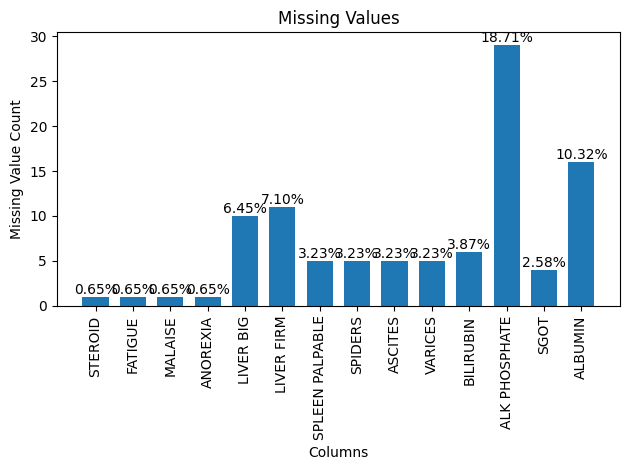

In [ ]:
# function untuk check missing values
def check_missing_values(df):
    missing_values = {}
    total_rows = len(df)

    for column in df.columns:
        missing_count = df[column].isna().sum()
        if missing_count > 0:
            missing_values[column] = missing_count

    # Jika tidak ada missing values pada datagram frame akan keluar dari function
    if len(missing_values) == 0:
        print(f'Tidak ada missing values pada Data Frame ini')
        return

    for column, count in missing_values.items():
        percentage = (count / total_rows) * 100
        print(f"Column '{column}': {count} missing value(s) ({percentage:.2f}%)")

    # buat bar chart
    if len(missing_values) > 0:
        # buat list columns, count missing value(s), dan persen
        columns = list(missing_values.keys())
        counts = list(missing_values.values())
        percentages = [(count / total_rows) * 100 for count in counts]

        # Plot missing value(s) menggunakan bar chart
        fig, ax = plt.subplots()
        bar_width = 0.7  # Adjust the width as needed
        ax.bar(range(len(columns)), counts, width=bar_width)

        # tambah label persen
        for i, count in enumerate(counts):
            ax.text(i, count, f"{percentages[i]:.2f}%", ha='center', va='bottom')

        # Set labels dan titles
        ax.set_xlabel('Columns')
        ax.set_ylabel('Missing Value Count')
        ax.set_title('Missing Values')
        ax.set_xticks(range(len(columns)))
        ax.set_xticklabels(columns, rotation=90)

        plt.tight_layout()
        plt.show()

# panggil procedure
check_missing_values(df)

In [ ]:
# Buat list column non binary
column_non_binary = ['ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'AGE']

# Buat list column binary
column_binary = [col for col in df.columns if col not in column_non_binary]

# Isi column non binary dengan mean column tersebut
for col in column_non_binary:
    df[col] = df[col].fillna(df[col].mean())

# Isi column binary dengan value paling sering muncul di column tersebut
for col in column_binary:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check ulang missing values
check_missing_values(df)

Tidak ada missing values pada Data Frame ini


In [ ]:
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,1
3,2,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,105.325397,242.0,3.3,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.000000,142.0,4.3,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.000000,20.0,4.1,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.000000,19.0,4.1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   AGE              155 non-null    int64  
 2   SEX              155 non-null    int64  
 3   STEROID          155 non-null    float64
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          155 non-null    float64
 6   MALAISE          155 non-null    float64
 7   ANOREXIA         155 non-null    float64
 8   LIVER BIG        155 non-null    float64
 9   LIVER FIRM       155 non-null    float64
 10  SPLEEN PALPABLE  155 non-null    float64
 11  SPIDERS          155 non-null    float64
 12  ASCITES          155 non-null    float64
 13  VARICES          155 non-null    float64
 14  BILIRUBIN        155 non-null    float64
 15  ALK PHOSPHATE    155 non-null    float64
 16  SGOT             155 non-null    float64
 17  ALBUMIN         

### **Mengubah Value df**
untuk value 2 diubah ke 1(True),
untuk value 1 diubah ke 0(False)

In [ ]:
# Membuat dictionary mapping value yang diubah
value_mapping = {1: 0, 2: 1}

# looping kolom binary dan isi dengan value_mapping
for column in df.columns:
    if column not in column_non_binary:
        df[column] = df[column].replace(value_mapping)

In [ ]:
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,1,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,85.000000,18.0,4.0,0
1,1,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.000000,42.0,3.5,0
2,1,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.000000,32.0,4.0,0
3,1,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.000000,52.0,4.0,0
4,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,105.325397,200.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,46,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,105.325397,242.0,3.3,1
151,1,44,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.000000,142.0,4.3,1
152,1,61,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.000000,20.0,4.1,1
153,1,53,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.000000,19.0,4.1,1


### **Handle non binary columns**


Untuk column 'BILIRUBIN' jika range nya 0,1 - 1,2 mg/dL termasuk normal(1) dan diluar range itu tidak normal(0)

In [ ]:
# Buat batasan normal
min = 0.1
max = 1.2

# Update the 'BILIRUBIN' column based on the range condition
df['BILIRUBIN'] = np.where((df['BILIRUBIN'] >= min) & (df['BILIRUBIN'] <= max), 1, 0)

Untuk column 'ALK PHOSPHATE' jika range nya 44 - 147 IU/L termasuk normal(1) dan diluar range itu tidak normal(0)

In [ ]:
# Buat batasan normal
min = 44
max = 147

# Update the 'BILIRUBIN' column based on the range condition
df['ALK PHOSPHATE'] = np.where((df['ALK PHOSPHATE'] >= min) & (df['ALK PHOSPHATE'] <= max), 1, 0)

Untuk column 'SGOT':
- Range normal(1) untuk laki-laki adalah 8 - 50 U/L
- Range normal(1) untuk perempuan adalah 8 - 45 U/L
- Selain range itu tidak normal(0).


In [ ]:
# Define the normal range for 'SGOT'
min_male = 8
max_male = 50
min_female = 8
max_female = 45

# Update the 'SGOT' column based on the range condition
df['SGOT'] = np.where(
    (df['SEX'] == 0) & (df['SGOT'] >= min_male) & (df['SGOT'] <= max_male) |
    (df['SEX'] == 1) & (df['SGOT'] >= min_female) & (df['SGOT'] <= max_female),
    1, 0
)

Untuk column 'ALBUMIN' jika range nya 3,5 - 5,5 g/dL termasuk normal(1) dan diluar range itu tidak normal(0)

In [ ]:
# Buat batasan normal
min = 3.5
max = 5.5

# Update the 'BILIRUBIN' column based on the range condition
df['ALBUMIN'] = np.where((df['ALBUMIN'] >= min) & (df['ALBUMIN'] <= max), 1, 0)

In [ ]:
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,1,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0,1,1,1,0
1,1,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,0
2,1,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,0
3,1,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,1,0
4,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,46,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,1
151,1,44,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,1,0,1,1
152,1,61,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1,1,1,1
153,1,53,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0,1,1,1,1


#### **Handle Duplicate Data**

In [ ]:
# Function untuk handle data duplikat
def handle_duplicates(df):
    # Periksa data duplikat
    duplicates = df[df.duplicated()]

    # Jika ada data duplikat, cetak data tersebut dan hapus duplikat dari DataFrame
    if not duplicates.empty:
        print("Data duplikat yang ditemukan:")
        print(duplicates)
        df.drop_duplicates(inplace=True)  # Drop semua rows yang mengandung duplikat
        print("Data duplikat telah dihapus.")
    else:
        print("Tidak ada Duplicate values pada Data Frame ini")

# Panggil function
handle_duplicates(df)

Data duplikat yang ditemukan:
    Class  AGE  SEX  STEROID  ANTIVIRALS  FATIGUE  MALAISE  ANOREXIA  \
44      1   34    0      1.0           1      1.0      1.0       1.0   

    LIVER BIG  LIVER FIRM  SPLEEN PALPABLE  SPIDERS  ASCITES  VARICES  \
44        1.0         1.0              1.0      1.0      1.0      1.0   

    BILIRUBIN  ALK PHOSPHATE  SGOT  ALBUMIN  HISTOLOGY  
44          0              1     0        1          0  
Data duplikat telah dihapus.


### **Split features(X) and target(Y) columns**

In [ ]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

In [ ]:
X

array([[30.,  1.,  0., ...,  1.,  1.,  0.],
       [50.,  0.,  0., ...,  1.,  1.,  0.],
       [78.,  0.,  1., ...,  1.,  1.,  0.],
       ...,
       [61.,  0.,  0., ...,  1.,  1.,  1.],
       [53.,  1.,  0., ...,  1.,  1.,  1.],
       [43.,  0.,  1., ...,  1.,  0.,  1.]])

In [ ]:
Y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

## **Data Visualization**

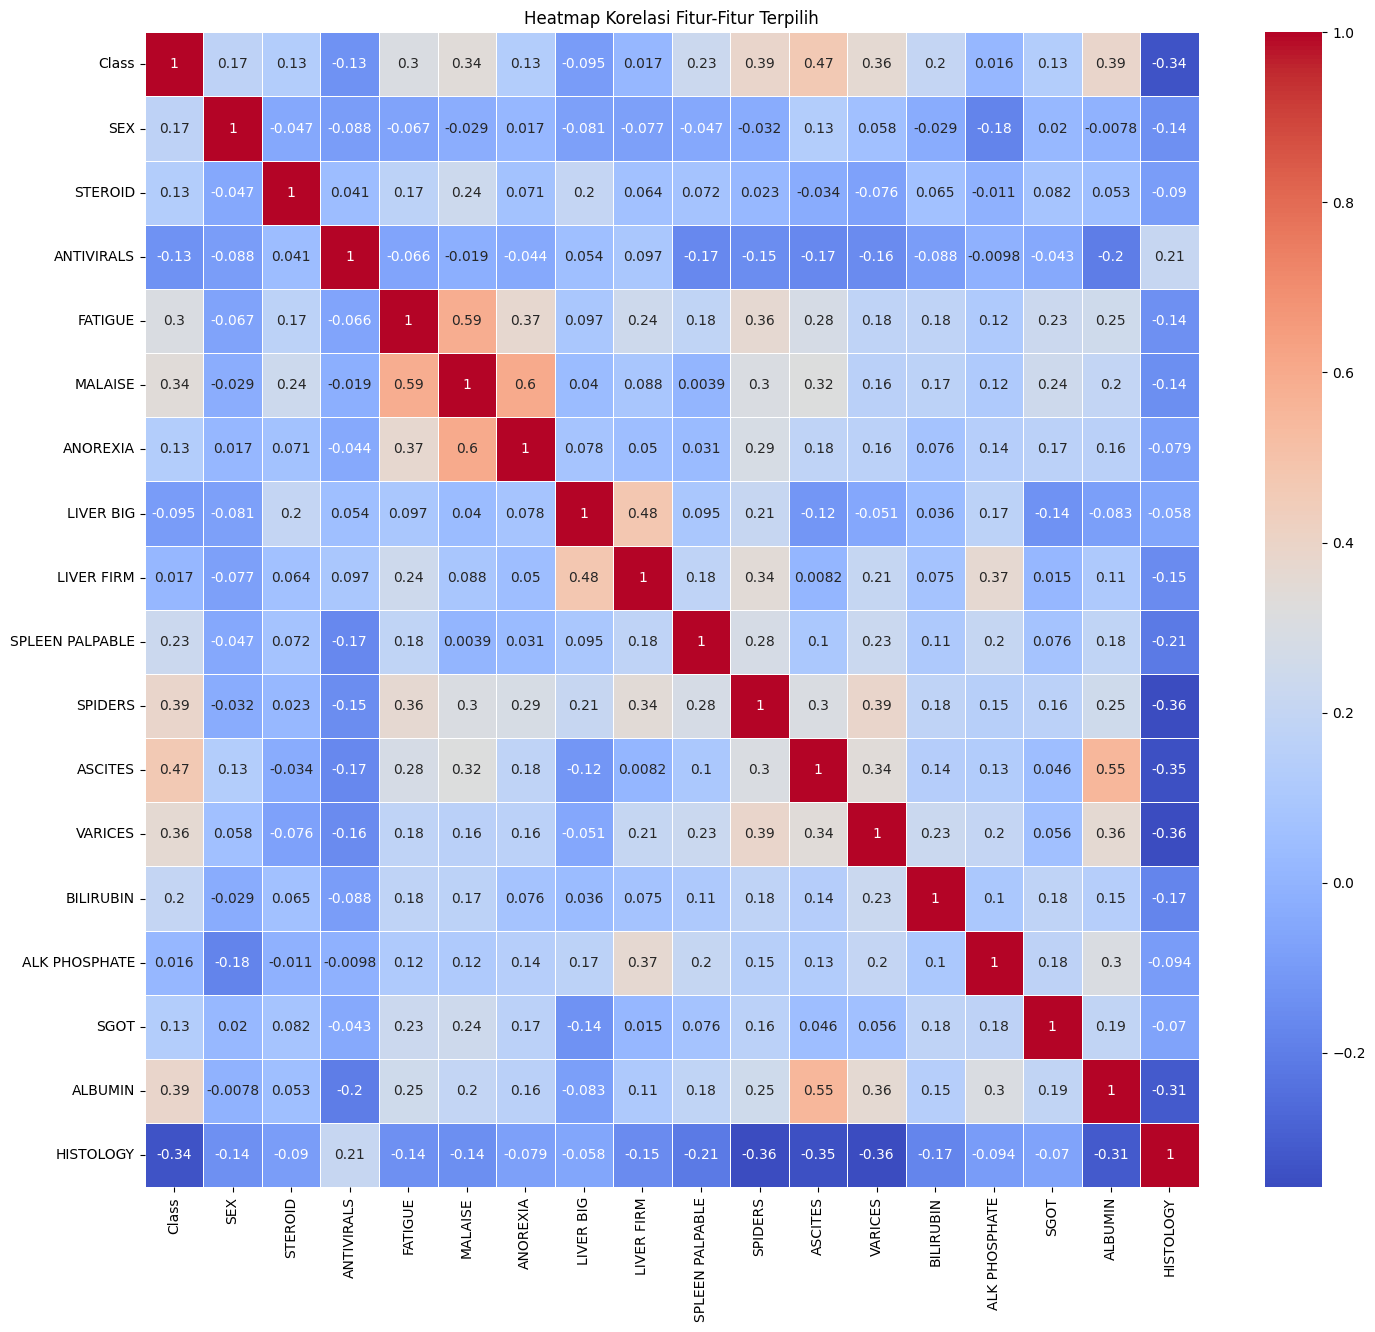

In [ ]:
selected_columns = ['Class', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
            'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES',
            'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'HISTOLOGY']

# Buat sub-DataFrame dengan kolom yang dipilih
selected_df = df[selected_columns]

# Hitung korelasi antar kolom
correlation_matrix = selected_df.corr()

# Plot heatmap
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi Fitur-Fitur Terpilih')
plt.show()

# **Baseline Model**


In [ ]:
# Decission Tree

class Node:
  # constructor untuk sebuah node
  def __init__(self, feature=None, threshold=None, left=None, right=None, *,value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value  #penanda apakah node yang digenerate adalah node daun atau bukan

  #fungsi untuk mengecek apakah sebuah node adalah node daun
  def isLeafNode(self):
    return self.value is not None

class DecissionTree:
  def __init__(self, minSamplesSplit=2, maxDepth=100, nFeatures=None):
    self.minSamplesSplit = minSamplesSplit
    self.maxDepth = maxDepth
    self.nFeatures = nFeatures  # banyaknya fitur yang akan digunakan dalam membangun tree
    self.root=None  # mengakses root/akar, proses traversal dimulai dari akar tree

  def fit(self, x, y): #fungsi untuk menentukan fitur dan akar pohon
    self.nFeatures = x.shape[1] if not self.nFeatures > x.shape[1] else min(x.shape[1],self.nFeatures) # memastikan nFeatures pada tree tidak melebihi banyak fitur keseluruhan
    self.root = self.growTree(x,y)

  def growTree(self, x, y, depth=0): # fungsi untuk menngembangkan tree (membangkitkan sub tree)
    nSamples, n_Features = x.shape # memperoleh banyak baris dan banyak fitur
    nLabels = len(np.unique(y)) # np.unique(y) mengembalikan label apa saja pada target (0,1)

    #cek kriteria stop
    #berhenti ketika kedalaman tree melebihi kedalaman maksimum, hanya terdapat 1 label (sudah mencapai node daun)
    #) atau banyaknya sample kurang dari minSamplesSplit
    #Lanjutkan dengan membangkitkan node anak
    if(depth >= self.maxDepth or nLabels == 1 or nSamples < self.minSamplesSplit):
      leafValue = self.mostCommonLabel(y)
      return Node(value=leafValue)  # sub tree diakhiri

    featureIdxs = np.random.choice(n_Features, self.nFeatures, replace=False) #array yang berisi indeks dari fitur-fitur yang dipilih secara random

    #temukan split yang paling baik (best split)
    bestFeature, bestThreshold = self.bestSplit(x,y,featureIdxs)

    #buat node anak /child
    leftIdxs, rightIdxs = self.split(x[:, bestFeature], bestThreshold)
    left = self.growTree(x[leftIdxs, :], y[leftIdxs], depth+1)
    right = self.growTree(x[rightIdxs, :], y[rightIdxs], depth+1)
    return Node(bestFeature, bestThreshold, left, right)


  def bestSplit(self, x, y, featureIdxs):
    bestGain = -1  #inisialisasi best_gain
    splitIdx, splitThreshold = None, None

    #jelajahi setiap kemungkinan threshold
    for fIdx in featureIdxs:
      x_column = x[:,fIdx]
      thresholds = np.unique(x_column)

      for threshold in thresholds:
        #hitung gain
        gain = self.informationGain(y,x_column, threshold)

        if gain > bestGain:
          bestGain = gain
          splitIdx = fIdx
          splitThreshold = threshold

    return splitIdx, splitThreshold

  def informationGain(self, y, x_column, threshold):
    #entropi parent
    parentEntropy = self.entropy(y)

    #buat anak-anak (children)
    leftIdxs, rightIdxs = self.split(x_column, threshold)

    if len(leftIdxs) == 0 or len(rightIdxs) == 0:
      return 0

    #hitung rata-rata entropi children
    n = len(y)
    nLeft, nRight = len(leftIdxs), len(rightIdxs)
    eLeft, eRight = self.entropy(y[leftIdxs]), self.entropy(y[rightIdxs])
    childEntropy = (nLeft/n) * eLeft + (nRight/n) * eRight

    #hitung information gain
    informationGain = parentEntropy - childEntropy
    return informationGain


  def split(self, x_column, splitThreshold):
    leftIdxs = np.argwhere(x_column <= splitThreshold).flatten()
    rightIdxs = np.argwhere(x_column > splitThreshold).flatten()
    return leftIdxs, rightIdxs

  def entropy(self,y):
    frek = np.bincount(y) #mencari frekuensi dari nilai-nilai pada array
    ps = frek/len(y)

    return -np.sum([p * np.log(p) for p in ps if p > 0])

  def mostCommonLabel(self,y): #fungsi untuk mencari label dengan jumlah paling banyak
    counter = Counter(y)
    val = counter.most_common(1)
    if val != []:
      val = counter.most_common(1)[0][0] # mencari nilai dengan jumlah terbanyak
      return val

  def predict(self, x): #prediksi
    return np.array([self.traverse(eks,self.root) for eks in x])

  def traverse(self, x, node): #menjelajahi tree dalam proses prediksi
    if node != None:
      if node.isLeafNode(): #mengembalikan nilai dari node daun
        return node.value

      if node.threshold != None and x[node.feature] <= node.threshold:
        return self.traverse(x,node.left)
      return self.traverse(x, node.right)




In [ ]:
# Random Forest

class RandomForest:
  def __init__(self, nTrees=10, maxDepth=10, minSamplesSplit=2, numOfFeatures=None):
    self.nTrees = nTrees
    self.maxDepth = maxDepth
    self.minSamplesSplit = minSamplesSplit
    self.numOfFeatures = numOfFeatures
    self.trees = []

  def fit(self, x, y):  #membuat forest
    self.trees = []
    for _ in range(self.nTrees): #buat tree sebanyak nTrees
      # buat tree
      tree = DecissionTree(maxDepth=self.maxDepth, minSamplesSplit=self.minSamplesSplit,nFeatures=self.numOfFeatures)
      x_sample, y_sample = self.bootstrap(x,y)
      tree.fit(x_sample, y_sample)
      self.trees.append(tree)

  def bootstrap(self, x, y):
    nSamples = x.shape[0] #mencari banyaknya sampel
    idxs = np.random.choice(nSamples, nSamples, replace=True)
    return x[idxs], y[idxs]

  def mostCommonLabel(self, y):
    counter = Counter(y)
    mostCommon = counter.most_common(1)[0][0] #mencari nilai dengan jumlah kemunculan terbanyak (vote)
    return mostCommon

  def predict(self, x):
    predictions = np.array([tree.predict(x) for tree in self.trees])
    preds = np.swapaxes(predictions, 0, 1)  #menyusun hasil agar tiap baris menampilkan hasil prediksi untuk satu sampel dari tiap pohon
    predictions = np.array([self.mostCommonLabel(pred) for pred in preds])
    return predictions

In [ ]:
# Set proporsi data untuk training (80 persen)
# Tentukan data untuk proses training dan testing
trainProportion = 0.8
numberOfTrainSamples = int(trainProportion * len(df))
x_train, y_train = X[:numberOfTrainSamples, :], Y[:numberOfTrainSamples]
x_test, y_test = X[numberOfTrainSamples:, :], Y[numberOfTrainSamples:]

# Definisikan accuracy test
def calc_accuracy(y_test, y_pred):
  acc = np.sum(y_test == y_pred) / len(y_test)
  return acc


In [ ]:
# BaseModel
numberOfTrees = 10
maximumDepth = 5
minSamplesSplit = 2
nFeatures = 2

rf1 = RandomForest(numberOfTrees, maximumDepth, minSamplesSplit, nFeatures)
rf1.fit(x_train, y_train)
predictions = rf1.predict(x_test)

acc = calc_accuracy(y_test, predictions)
print("akurasi =", acc)

akurasi = 0.7419354838709677


In [ ]:
# Model 1
numberOfTrees = 10
maximumDepth = 8
minSamplesSplit = 2
nFeatures = 2

rf2 = RandomForest(numberOfTrees, maximumDepth, minSamplesSplit, nFeatures)
rf2.fit(x_train, y_train)
predictions = rf2.predict(x_test)

acc = calc_accuracy(y_test, predictions)
print("akurasi =", acc)

akurasi = 0.7419354838709677


In [ ]:
# Model 2
numberOfTrees = 10
maximumDepth = 5
minSamplesSplit = 3
nFeatures = 2

rf3 = RandomForest(numberOfTrees, maximumDepth, minSamplesSplit, nFeatures)
rf3.fit(x_train, y_train)
predictions = rf3.predict(x_test)

acc = calc_accuracy(y_test, predictions)
print("akurasi =", acc)

akurasi = 0.7096774193548387


In [ ]:
# Model 3
numberOfTrees = 10
maximumDepth = 5
minSamplesSplit = 2
nFeatures = 3

rf4 = RandomForest(numberOfTrees, maximumDepth, minSamplesSplit, nFeatures)
rf4.fit(x_train, y_train)
predictions = rf4.predict(x_test)

acc = calc_accuracy(y_test, predictions)
print("akurasi =", acc)

akurasi = 0.6774193548387096


#**Eksplorasi Model dan Evaluasi**

##Eksplorasi

Disini akan di explore hyperparameter berikut:
- numberOfTrees = [30, 60, 100]
- maximumDepth = [5, 10, 15]
- minSamplesSplit = [2, 3, 5]
- nFeatures = [2, 4, 6]

In [ ]:
class RFHyperparameterExplorer:
    def __init__(self, x_train, y_train, x_test, y_test, n_trees_values, max_depth_values, min_samples_split_values, n_features_values):
        # Inisialisasi objek dengan data pelatihan dan pengujian serta nilai hyperparameter yang akan dieksplorasi
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.n_trees_values = n_trees_values
        self.max_depth_values = max_depth_values
        self.min_samples_split_values = min_samples_split_values
        self.n_features_values = n_features_values
        self.results = []  # Simpan hasil eksplorasi hyperparameter

    def explore_hyperparameters(self): # Fungsi untuk mengeksplorasi kombinasi hyperparameter
        for n_trees in self.n_trees_values:
            for max_depth in self.max_depth_values:
                for min_samples_split in self.min_samples_split_values:
                    for n_features in self.n_features_values:
                        # Membuat model Random Forest dengan hyperparameter tertentu
                        rf = RandomForest(n_trees, max_depth, min_samples_split, n_features)
                        rf.fit(self.x_train, self.y_train)
                        predictions = rf.predict(self.x_test)
                        acc = calc_accuracy(self.y_test, predictions)  # Menghitung akurasi

                        # Menyimpan hasil eksplorasi dalam bentuk dictionary
                        result = {
                            'numberOfTrees': n_trees,
                            'maximumDepth': max_depth,
                            'minSamplesSplit': min_samples_split,
                            'nFeatures': n_features,
                            'accuracy': acc
                        }

                        self.results.append(result)  # Menambahkan hasil ke dalam list

        return self.results

    def print_best_result(self):# Fungsi untuk mencetak hasil terbaik berdasarkan akurasi tertinggi
        best_accuracy = -1
        best_result = None

        for result in self.results:
            if result['accuracy'] > best_accuracy:
                best_accuracy = result['accuracy']
                best_result = result

        if best_result:
            print("Hyperparameter Terbaik:")
            print(f"numberOfTrees\t: {best_result['numberOfTrees']}")
            print(f"maximumDepth\t: {best_result['maximumDepth']}")
            print(f"minSamplesSplit\t: {best_result['minSamplesSplit']}")
            print(f"nFeatures\t: {best_result['nFeatures']}")
            print(f"Accuracy\t: {best_result['accuracy']}")
        else:
            print("Tidak ditemukan hasil!")


In [ ]:
# Membuat objek RFHyperparameterExplorer dengan data pelatihan dan pengujian serta nilai hyperparameter yang akan dieksplorasi
eksplorasi = RFHyperparameterExplorer(x_train, y_train, x_test, y_test,
                                              n_trees_values=[30, 60, 100],
                                              max_depth_values=[5, 10, 15],
                                              min_samples_split_values=[2, 3, 5],
                                              n_features_values=[2, 4, 6])
# Melakukan eksplorasi hyperparameter
results = eksplorasi.explore_hyperparameters()

# Print hasilnya
for result in results:
    print(result)

{'numberOfTrees': 30, 'maximumDepth': 5, 'minSamplesSplit': 2, 'nFeatures': 2, 'accuracy': 0.7419354838709677}
{'numberOfTrees': 30, 'maximumDepth': 5, 'minSamplesSplit': 2, 'nFeatures': 4, 'accuracy': 0.7419354838709677}
{'numberOfTrees': 30, 'maximumDepth': 5, 'minSamplesSplit': 2, 'nFeatures': 6, 'accuracy': 0.8387096774193549}
{'numberOfTrees': 30, 'maximumDepth': 5, 'minSamplesSplit': 3, 'nFeatures': 2, 'accuracy': 0.7419354838709677}
{'numberOfTrees': 30, 'maximumDepth': 5, 'minSamplesSplit': 3, 'nFeatures': 4, 'accuracy': 0.5806451612903226}
{'numberOfTrees': 30, 'maximumDepth': 5, 'minSamplesSplit': 3, 'nFeatures': 6, 'accuracy': 0.7419354838709677}
{'numberOfTrees': 30, 'maximumDepth': 5, 'minSamplesSplit': 5, 'nFeatures': 2, 'accuracy': 0.8064516129032258}
{'numberOfTrees': 30, 'maximumDepth': 5, 'minSamplesSplit': 5, 'nFeatures': 4, 'accuracy': 0.6774193548387096}
{'numberOfTrees': 30, 'maximumDepth': 5, 'minSamplesSplit': 5, 'nFeatures': 6, 'accuracy': 0.7419354838709677}
{

##Evaluasi

In [ ]:
# Print model terbaik
eksplorasi.print_best_result()

Hyperparameter Terbaik:
numberOfTrees	: 30
maximumDepth	: 5
minSamplesSplit	: 2
nFeatures	: 6
Accuracy	: 0.8387096774193549


# **Hasil dan Analisis**

###Hasil
Hasil dari penelitian ini menunjukkan bahwa kombinasi parameter terbaik untuk model Random Forest pada dataset Hepatitis adalah numberOfTrees sebanyak 30, maximumDepth sebanyak 5, minSamplesSplit sebanyak 2, dan nFeatures sebanyak 6. Dengan konfigurasi ini, model mencapai tingkat akurasi sebesar 83.87%. Hasil ini menggambarkan kemampuan model dalam memberikan prediksi dengan akurasi tinggi dan seimbang antara ketepatan dan kelengkapan prediksi.

###Analisis
- numberOfTrees(30): Model Random Forest terdiri dari 30 pohon keputusan, memungkinkan model untuk menangkap berbagai pola dan variasi dalam data melalui mayoritas suara dari setiap pohon.

- maximumDepth(5): Pembatasan kedalaman pohon keputusan pada 5 tingkat membantu mencegah model dari menjadi terlalu kompleks atau overfitting terhadap data pelatihan, meningkatkan kemampuan model untuk generalisasi pada data yang belum dilihat sebelumnya.

- minSamplesSplit(2): Dengan nilai 2, parameter ini menunjukkan bahwa setidaknya dua sampel yang berbeda diperlukan agar suatu node memutuskan untuk melakukan split, memungkinkan pohon untuk menangkap detail-detail kecil dalam data pelatihan.

- nFeatures(6): Model mempertimbangkan enam fitur pada setiap langkah ketika membangun pohon, memberikan fleksibilitas lebih besar pada model untuk menyesuaikan pola-pola kompleks dalam data. Risiko overfitting dapat meningkat terutama pada dataset yang relatif kecil.

- Accuracy(0.8387): Model mampu memprediksi dengan benar sekitar 83.87% dari seluruh instance pada data uji, menunjukkan tingkat keakuratan yang baik dalam prediksinya.

# **Kesimpulan**


Penelitian ini menghasilkan model Random Forest terbaik untuk dataset Hepatitis dengan konfigurasi numberOfTrees 30, maximumDepth 5, minSamplesSplit 2, dan nFeatures 6. Hasil evaluasi menunjukkan tingkat akurasi sebesar 83.87%, mencerminkan kemampuan model dalam mengatasi kompleksitas dan variasi data Hepatitis. Analisis parameter menunjukkan bahwa jumlah pohon keputusan yang moderat, batasan kedalaman, sensitivitas terhadap detail kecil, dan pertimbangan enam fitur pada setiap langkah adalah kunci keberhasilan model ini. Meskipun demikian, keberlakuan hasil ini berdasarkan pada karakteristik khusus dataset Hepatitis, dan penggunaan model perlu dipertimbangkan dengan cermat sesuai dengan sifat unik dari setiap dataset yang berbeda. Kontribusi penelitian ini tidak hanya terletak pada pengembangan model yang handal untuk prediksi Hepatitis, tetapi juga memberikan wawasan berharga terhadap penyesuaian parameter yang optimal, memberikan landasan untuk penelitian lebih lanjut dalam pemodelan penyakit infeksi lainnya dan memberikan panduan bagi praktisi kesehatan dalam pengambilan keputusan di bidang diagnosis dan manajemen penyakit Hepatitis.